In [7]:
import numpy as np
import matplotlib.pyplot as plt

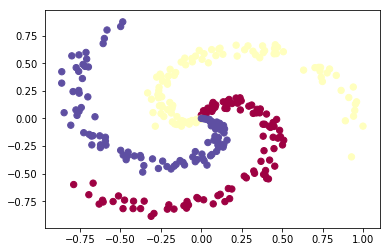

In [9]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [12]:
#initialising the parameters
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

In [13]:
# compute class scores for a linear classifier
scores = np.dot(X, W) + b

In [15]:
num_examples = X.shape[0]
#unnormalised log probablities
exp_scores = np.exp(scores)
#normalise for each example
probs = exp_scores/np.sum(exp_scores, axis=1, keepdims=True)

In [17]:
correct_logprobs = -np.log(probs[range(num_examples),y])

In [19]:
# compute the loss: average cross-entropy loss and regularization
reg = 0.001
data_loss = np.sum(correct_logprobs)/num_examples
reg_loss = 0.5*reg*np.sum(W*W)
loss = data_loss + reg_loss

In [20]:
#gradient on the scores
dscores = probs
dscores[range(num_examples),y] -= 1
dscores /= num_examples

In [21]:
#backpropagation
dW = np.dot(X.T, dscores)
db = np.sum(dscores, axis=0, keepdims=True)
dW += reg*W # don't forget the regularization gradient

In [23]:
# perform a parameter update
step_size = 1e-0
W += -step_size * dW
b += -step_size * db

In [25]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.52


In [27]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):
  
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.098412
iteration 10: loss 0.899242
iteration 20: loss 0.825331
iteration 30: loss 0.791402
iteration 40: loss 0.773476
iteration 50: loss 0.763096
iteration 60: loss 0.756697
iteration 70: loss 0.752573
iteration 80: loss 0.749824
iteration 90: loss 0.747945
iteration 100: loss 0.746635
iteration 110: loss 0.745707
iteration 120: loss 0.745041
iteration 130: loss 0.744558
iteration 140: loss 0.744205
iteration 150: loss 0.743945
iteration 160: loss 0.743753
iteration 170: loss 0.743610
iteration 180: loss 0.743503
iteration 190: loss 0.743422


In [28]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

(-1.8868139431937232, 1.8731860568062801)

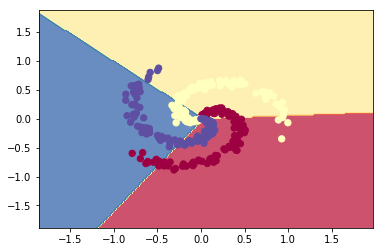

In [29]:
fig